In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from time import time
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# For Google Drive
# PATH = '/content/drive/MyDrive/SER 517/Dataset/'
# Dataset = pd.read_csv(PATH + 'csv_preprocessed.csv')

# # For Local Jupyter Notebook
PATH = 'C:\\Users\\josep\\OneDrive\\Desktop\\Capstone\\Jupyter\\Dataset\\'
Dataset = pd.read_csv(PATH + 'csv_preprocessed.csv')

# Dataset = pd.read_csv('/scratch/vrames25/NIDS/datasets/csv_preprocessed.csv', low_memory=False)

In [5]:
# Classiying all malicious attacks as 1

Dataset['Attack Type'] = Dataset['Attack Type'].apply(lambda x: 0 if x == 0 else 1)

In [6]:
data = Dataset[["SrcWin", "DstWin", "dHops", "dTtl", "TotBytes", "SrcBytes", "sMeanPktSz", "DstGap", "SrcGap", "dTos", "DstTCPBase", "SrcTCPBase", "TcpRtt", "Proto_udp", "DstBytes", "AckDat" , "dMeanPktSz", "Proto_tcp", "SynAck", "Load", "Rate", "DstPkts", "SrcLoad", "Dur", "SrcRate"]]

In [7]:
def concat_column(dataset, column_name):
  concat_column_data = pd.concat([dataset, Dataset[column_name]], axis = 1)
  return concat_column_data

data = concat_column(data, "Attack Type")

In [8]:
# Segregate features and labels into separate variables
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Attack Type'], data['Attack Type'],
                                                    stratify=data['Attack Type'],
                                                    test_size=0.15)

X_train = pd.DataFrame(X_train, columns=data.columns.to_list()[:-1])
X_test = pd.DataFrame(X_test, columns=data.columns.to_list()[:-1])
y_train = pd.DataFrame(y_train, columns=['Attack Type'])
y_test = pd.DataFrame(y_test, columns=['Attack Type'])

print("Training dataset size:", X_train.shape)
print("Testing dataset size:", X_test.shape)
print("Training target size:", y_train.shape)
print("Testing target size:", y_test.shape)

Training dataset size: (1033323, 25)
Testing dataset size: (182352, 25)
Training target size: (1033323, 1)
Testing target size: (182352, 1)


In [9]:
# def get_pca_df(dataset, no_of_components):
#   from sklearn.decomposition import PCA
#   pca = PCA(n_components=no_of_components)
#   Principal_components=pca.fit_transform(dataset)
#   column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
#   pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
#   return pca_df, pca


def pca_train_test(X_train, X_test, no_of_components):

  # Initialize PCA model
  pca = PCA(n_components=no_of_components)

  # Fit and transform the training data
  Principal_components_train = pca.fit_transform(X_train)
  column_names = ["PC " + str(i) for i in range(1, no_of_components + 1)]

  # Create a DataFrame for the training data
  train_data = pd.DataFrame(data=Principal_components_train, columns=column_names)

  # # Transform the test data using the same PCA model
  # Principal_components_test = pca.transform(X_test)

  # # Create a DataFrame for the test data
  # test_data = pd.DataFrame(data=Principal_components_test, columns=column_names)

  test_data = pca.transform(X_test)

  return train_data, test_data

In [10]:
X_train, X_test = pca_train_test(X_train, X_test, 15)

In [11]:
y_train = y_train.values.ravel()

In [12]:
# Initialize and train the SVC model
svc_model = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.
start_time = time()
svc_model.fit(X_train, y_train)
end_time = time()

In [13]:
print(f' Train start: {start_time}')
print(f' Train end: {end_time}')
print(f' Training time: {end_time - start_time} seconds\n')

 Train start: 1713836808.2693658
 Train end: 1713848261.7741961
 Training time: 11453.504830360413 seconds



In [14]:
# Predictions
prediction_start_time = time()
y_pred_SVC = svc_model.predict(X_test)
prediction_end_time = time()

In [15]:
print(f' Prediction start: {prediction_start_time}')
print(f' Prediction end: {prediction_end_time}')
print(f' Prediction time: {prediction_end_time - prediction_start_time} seconds\n')

 Prediction start: 1713848261.8217452
 Prediction end: 1713848280.145665
 Prediction time: 18.323919773101807 seconds



In [16]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 71629      0]
 [     2 110721]]


In [17]:
le_name_mapping = {'Benign': 0, 'Malicious': 1}

In [18]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred_SVC)

In [19]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = le_name_mapping.keys(),
                     columns = le_name_mapping.keys())

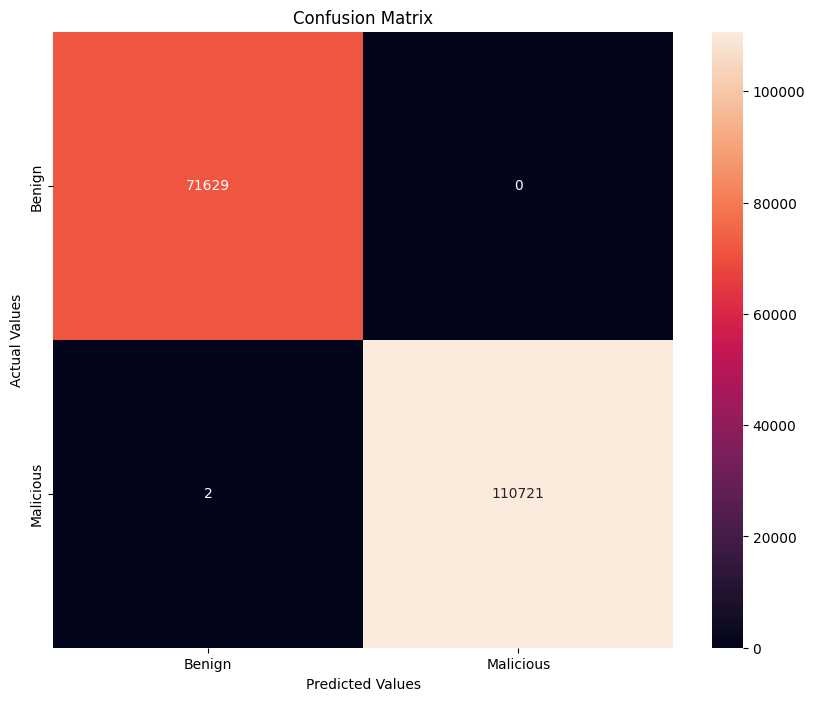

In [23]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix_svm_binary.png')

In [24]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999890322014565


In [25]:
precision = precision_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'Precision: {precision}')

Precision: 0.9999890325076871


In [26]:
recall = recall_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'Recall: {recall}')

Recall: 0.9999890322014565


In [27]:
f1 = f1_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'F1 Score: {f1}')

F1 Score: 0.9999890322284867


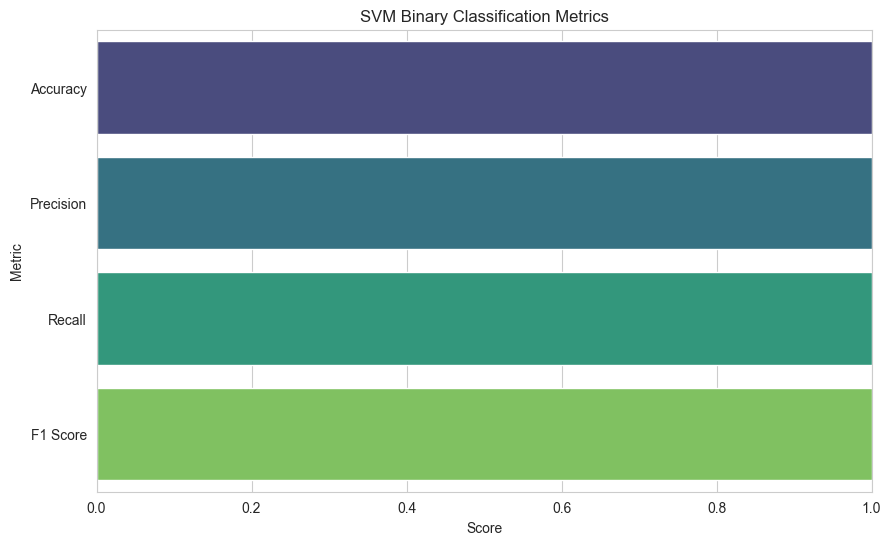

In [29]:
# Assuming metrics are stored in these variables
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    # 'ROC-AUC': roc_auc  # Uncomment if ROC-AUC is applicable and calculated
}

# Convert dictionary to lists for plotting
metric_names = list(metrics.keys())
metric_values = [metrics[metric] for metric in metric_names]

# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_values, y=metric_names, palette="viridis")

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('SVM Binary Classification Metrics')
plt.xlim(0, 1)  # Assuming the scores are between 0 and 1
plt.savefig('svm_binary_metrics.png')